In [ ]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

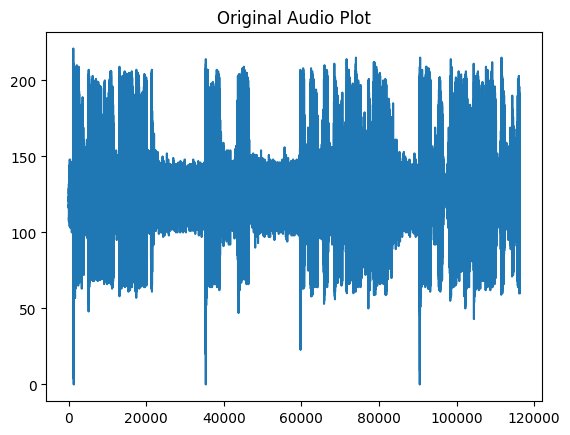

In [ ]:
fs, data = wavfile.read('/content/sample_data/JFK.wav')
plt.plot(data)
plt.title("Original Audio Plot")
data_1 = list(data)

In [ ]:
import random
from math import gcd
p = int(input("Enter first prime encryption component: "))
q = int(input("Enter second prime encryption component: "))

n = p*q
print("n = p1*p2 = ",n)
phi_n = (p-1)*(q-1)
print("Modulus Component is",phi_n)

import random
from math import gcd

def generate_e(phi_n):
    while True:
        e = random.randrange(2, phi_n)
        if gcd(e, phi_n) == 1:
            return e

e=generate_e(phi_n)
print("encryption component is",e)

def mod_inverse(e, phi_n):
    t1, t2 = 0, 1
    r, new_r = phi_n, e

    while new_r != 0:
        quotient = r // new_r
        t1, t2 = t2, t1 - quotient * t2
        r, new_r = new_r, r - quotient * new_r

    if r > 1:
        return None
    if t1 < 0:
        t1 += phi_n

    return t1

d=mod_inverse(e, phi_n)
print("decryption component is",d)

Enter first prime encryption component: 17
Enter second prime encryption component: 19
n = p1*p2 =  323
Modulus Component is 288
encryption component is 73
decryption component is 217


Text(0.5, 1.0, 'Encrypted Audio Plot')

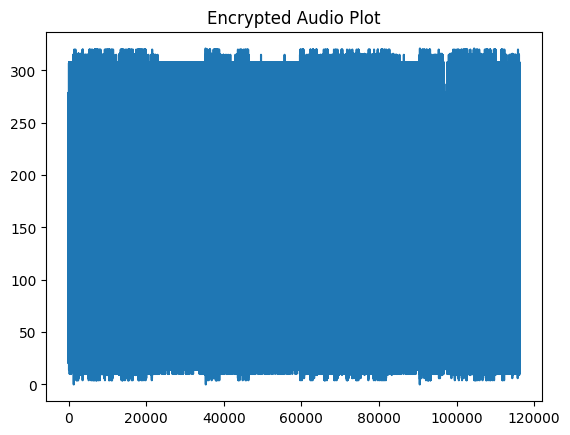

In [ ]:
scaled_data = [int((i*255)/(n-1)) for i in data_1]
EncryptedAudio = [pow(i, e, n) for i in scaled_data]
plt.plot(EncryptedAudio)
plt.title("Encrypted Audio Plot")

Text(0.5, 1.0, 'Decrypted Audio Plot')

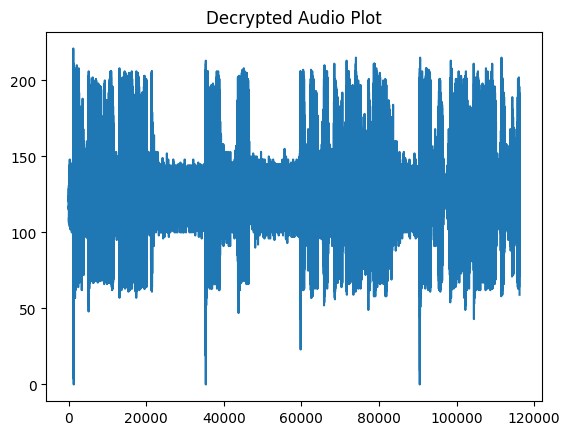

In [ ]:
DecryptedAudio=[]
for i in EncryptedAudio:
    d1=pow(i, d, n)
    DecryptedAudio.append(d1)
DecryptedAudio = [round((i*(n-1))/255) for i in [pow(i, d, n) for i in EncryptedAudio]]
plt.plot(DecryptedAudio)
plt.title("Decrypted Audio Plot")

In [ ]:
#Assessing Performance: Segmental Spectral Signal to Noise Ratio(SSNR) and Cepstral Distance Measure(CD).

In [ ]:
import numpy as np

def CD(original, encrypted):
    c_x = np.fft.ifft(np.log(np.abs(np.fft.fft(original))))
    c_y = np.fft.ifft(np.log(np.abs(np.fft.fft(encrypted))))
    cd = 10 * np.log10(np.sum((np.abs(c_x[1:]) - np.abs(c_y[1:])) ** 2))
    return cd



def SSSNR(original, enc):
    x = np.array(original)
    y = np.array(enc)
    ss = 10 * np.log10(np.sum(np.abs(x) ** 2) / np.sum((np.abs(x) - np.abs(y)) ** 2))
    return ss

# Calculate performance metrics
cd_metric = CD(data_1, EncryptedAudio)

sssnr_metric = SSSNR(data_1, EncryptedAudio)

print("CD:", cd_metric)
print("SSSNR:", sssnr_metric)

CD: 2.3851591447165243
SSSNR: -20.800550961426943


In [ ]:
def CD1(original, dec):
    c_x = np.fft.ifft(np.log(np.abs(np.fft.fft(original))))
    c_y = np.fft.ifft(np.log(np.abs(np.fft.fft(dec))))
    cd = 10 * np.log10(np.sum((np.abs(c_x[1:]) - np.abs(c_y[1:])) ** 2))
    return cd

def SSSNR1(original, decrypted):
    x = np.array(original)
    y = np.array(decrypted)
    ss = 10 * np.log10(np.sum(np.abs(x) ** 2) / np.sum((np.abs(x) - np.abs(y)) ** 2))
    return ss

# Calculate performance metrics
cd_metric1 = CD1(data_1, DecryptedAudio)

sssnr_metric1 = SSSNR1(data_1, DecryptedAudio)

print("CD:", cd_metric1)
print("SSSNR:", sssnr_metric1)

CD: -13.34927388411682
SSSNR: 20.982148951706954


In [ ]:
#HISTOGRAM ANALYSIS
#presented cryptosystem provides good encryption quality

Text(0.5, 1.0, 'Original Audio Signal')

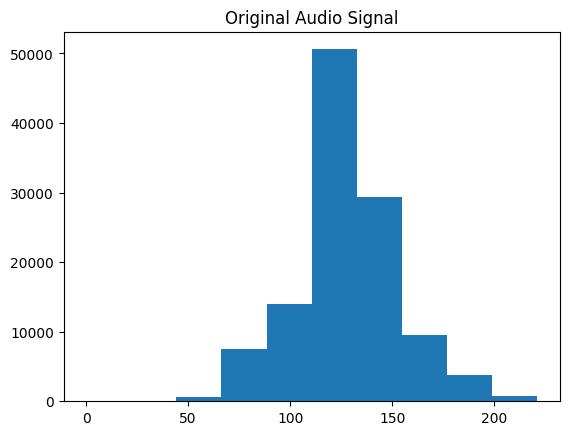

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data_1)
plt.title("Original Audio Signal")

Text(0.5, 1.0, 'Encrypted Audio Signal')

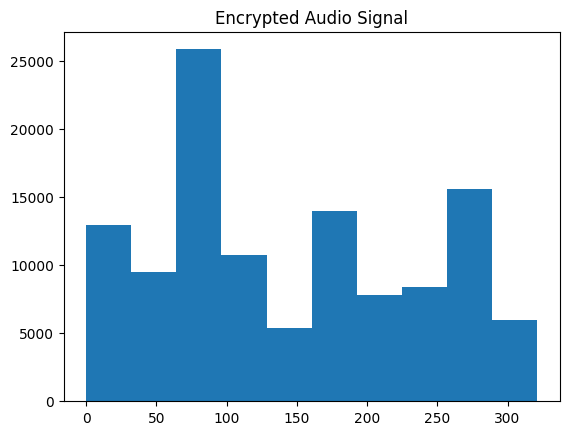

In [ ]:
plt.hist(EncryptedAudio)
plt.title("Encrypted Audio Signal")